#####VarunSehgal_L00156279_ChicagoCrime_Spark_predictive_analysis

#####Here we create the model to perform analysis on the Crime data from Chicago Police Departmnent.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Read dataset from  /FileStore/tables/Crimes___2001_to_Present.csv
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, TimestampType
df = (sqlContext.read.format("csv").
  option("header", "true").
  option("nullValue", "NA").
  option("inferSchema", True).
  load("/FileStore/tables/Crimes___2001_to_Present.csv"))

In [0]:
# View the data
display(df)

ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,false,true,924,9,12,61,08B,1165074,1875917,2015,02/10/2018 03:50:01 PM,41.815117282,-87.669999562,"(41.815117282, -87.669999562)"
10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,false,false,1511,15,29,25,06,1138875,1904869,2015,02/10/2018 03:50:01 PM,41.895080471,-87.765400451,"(41.895080471, -87.765400451)"
11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,false,true,631,6,8,44,06,null,null,2018,04/06/2019 04:04:43 PM,null,null,null
10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,true,false,1412,14,35,21,18,1152037,1920384,2015,02/10/2018 03:50:01 PM,41.937405765,-87.716649687,"(41.937405765, -87.716649687)"
10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,false,true,1522,15,28,25,08A,1141706,1900086,2015,02/10/2018 03:50:01 PM,41.881903443,-87.755121152,"(41.881903443, -87.755121152)"
10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,false,false,614,6,21,71,05,1168430,1850165,2015,02/10/2018 03:50:01 PM,41.744378879,-87.658430635,"(41.744378879, -87.658430635)"
10224743,HY411629,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,false,false,1434,14,32,24,05,1161628,1912157,2015,02/10/2018 03:50:01 PM,41.914635603,-87.681630909,"(41.914635603, -87.681630909)"
10224744,HY411605,09/05/2015 01:00:00 PM,025XX W CERMAK RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,true,false,1034,10,25,31,06,1159734,1889313,2015,09/17/2015 11:37:18 AM,41.851988885,-87.689219118,"(41.851988885, -87.689219118)"
10224745,HY411654,09/05/2015 11:30:00 AM,031XX W WASHINGTON BLVD,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,false,true,1222,12,27,27,03,1155536,1900515,2015,02/10/2018 03:50:01 PM,41.88281374,-87.704325717,"(41.88281374, -87.704325717)"
11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,null,false,false,824,8,15,63,11,null,null,2016,04/06/2019 04:04:43 PM,null,null,null


In [0]:
#View the columns in the base dataset
df.columns

Out[137]: ['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [0]:
# Remove the columns which are not required
drop_list = ['District', 'Address', 'X Coordinate', 'Y Coordinate']

df = df.select([column for column in df.columns if column not in drop_list])

In [0]:
# View the contents of the dataset
df.head(5)

Out[139]: [Row(ID=10224738, Case Number='HY411648', Date='09/05/2015 01:30:00 PM', Block='043XX S WOOD ST', IUCR='0486', Primary Type='BATTERY', Description='DOMESTIC BATTERY SIMPLE', Location Description='RESIDENCE', Arrest=False, Domestic=True, Beat=924, Ward=12, Community Area=61, FBI Code='08B', Year=2015, Updated On='02/10/2018 03:50:01 PM', Latitude=41.815117282, Longitude=-87.669999562, Location='(41.815117282, -87.669999562)'),
 Row(ID=10224739, Case Number='HY411615', Date='09/04/2015 11:30:00 AM', Block='008XX N CENTRAL AVE', IUCR='0870', Primary Type='THEFT', Description='POCKET-PICKING', Location Description='CTA BUS', Arrest=False, Domestic=False, Beat=1511, Ward=29, Community Area=25, FBI Code='06', Year=2015, Updated On='02/10/2018 03:50:01 PM', Latitude=41.895080471, Longitude=-87.765400451, Location='(41.895080471, -87.765400451)'),
 Row(ID=11646166, Case Number='JC213529', Date='09/01/2018 12:01:00 AM', Block='082XX S INGLESIDE AVE', IUCR='0810', Primary Type='THEFT', Description='OVER $500', Location Description='RESIDENCE', Arrest=False, Domestic=True, Beat=631, Ward=8, Community Area=44, FBI Code='06', Year=2018, Updated On='04/06/2019 04:04:43 PM', Latitude=None, Longitude=None, Location=None),
 Row(ID=10224740, Case Number='HY411595', Date='09/05/2015 12:45:00 PM', Block='035XX W BARRY AVE', IUCR='2023', Primary Type='NARCOTICS', Description='POSS: HEROIN(BRN/TAN)', Location Description='SIDEWALK', Arrest=True, Domestic=False, Beat=1412, Ward=35, Community Area=21, FBI Code='18', Year=2015, Updated On='02/10/2018 03:50:01 PM', Latitude=41.937405765, Longitude=-87.716649687, Location='(41.937405765, -87.716649687)'),
 Row(ID=10224741, Case Number='HY411610', Date='09/05/2015 01:00:00 PM', Block='0000X N LARAMIE AVE', IUCR='0560', Primary Type='ASSAULT', Description='SIMPLE', Location Description='APARTMENT', Arrest=False, Domestic=True, Beat=1522, Ward=28, Community Area=25, FBI Code='08A', Year=2015, Updated On='02/10/2018 03:50:01 PM', Latitude=41.881903443, Longitude=-87.755121152, Location='(41.881903443, -87.755121152)')]

In [0]:
# Get the schema
df.columns

Out[140]: ['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'Ward',
 'Community Area',
 'FBI Code',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [0]:
# Drop rows with null value
df = df.dropna()

In [0]:
crimetype_primary_group = df.groupBy('Primary Type').count()

In [0]:
crimetype_primary_group_cnt = crimetype_primary_group.orderBy('count', ascending=False)
counts_crimetype = pd.DataFrame(crimetype_primary_group_cnt.rdd.map(lambda l: l.asDict()).collect())

In [0]:
counts_crimetype

Out[144]:

,Primary Type,count
0,THEFT,1395841
1,BATTERY,1211553
2,CRIMINAL DAMAGE,754646
3,NARCOTICS,660162
4,ASSAULT,421060
5,OTHER OFFENSE,409479
6,BURGLARY,374899
7,MOTOR VEHICLE THEFT,300307
8,DECEPTIVE PRACTICE,272401
9,ROBBERY,249661


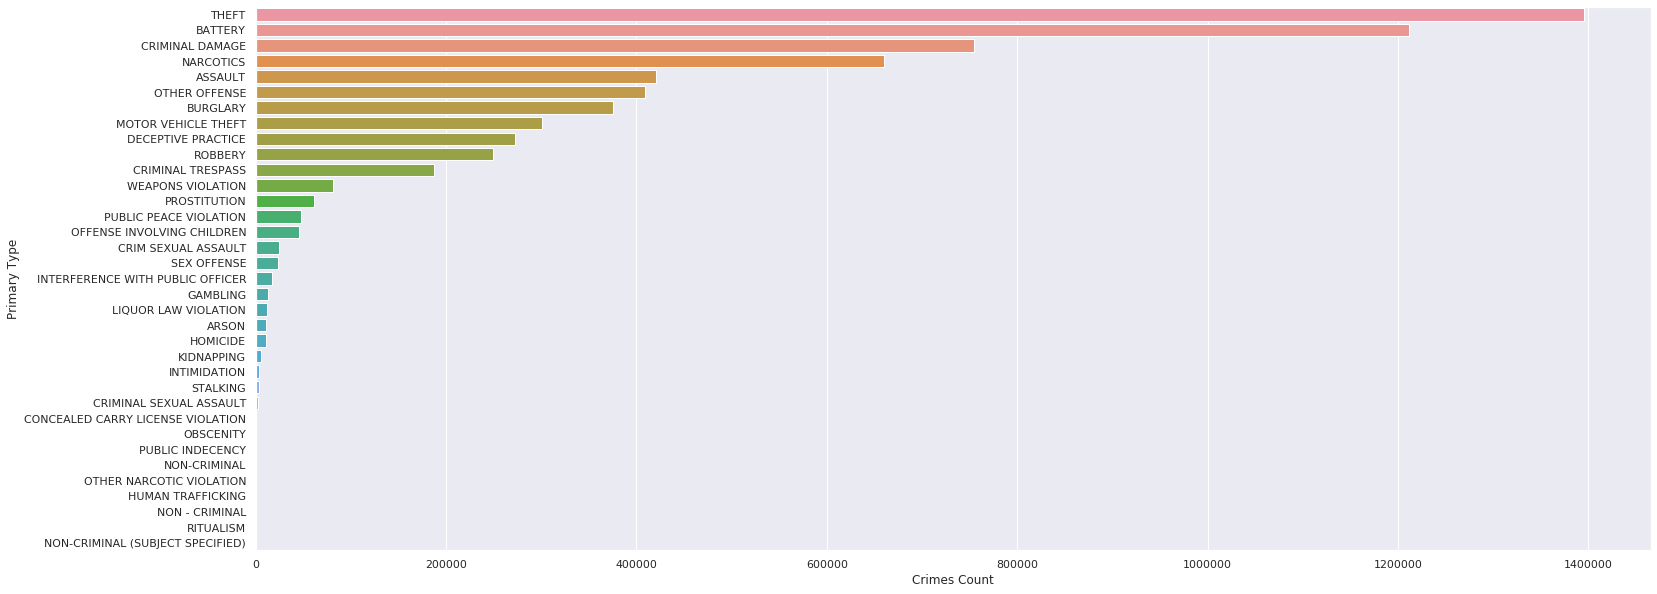

In [0]:
#Plot the graph to see which Primary Type crime category is higher
sns.set_color_codes("bright")
plt.rcParams["figure.figsize"] = [25, 10]

sns.color_palette("rocket")

type_graph = sns.barplot(x='count', y='Primary Type', data=counts_crimetype)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Count")
display()

In [0]:
crime_year = df.groupBy('Year').count()
counts_year = pd.DataFrame(crime_year.rdd.map(lambda l: l.asDict()).collect())

Out[147]:

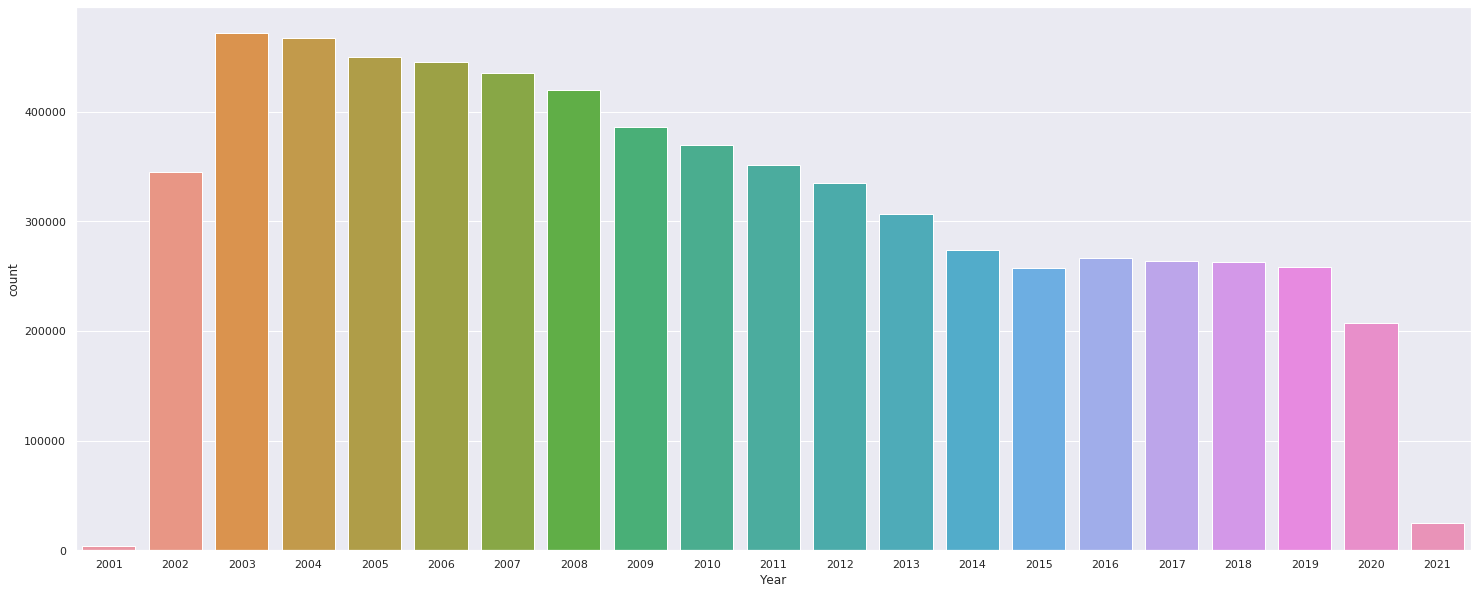

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Year')]

In [0]:
#Plot the graph to see which Primary Type crime category is higher

sns.set_color_codes("bright")
plt.rcParams["figure.figsize"] = [25, 10]

sns.color_palette("rocket")

ax = sns.barplot(x='Year', y='count', data=counts_year)
ax.set(ylabel="count", xlabel="Year")




In [0]:
import datetime
from pyspark.sql.functions import *

In [0]:
#Convert dates to a timestamp type.
datesdata = df.withColumn('date_time', to_timestamp('date', 'MM/dd/yyyy hh:mm:ss a'))\
       .withColumn('month', trunc('date_time', 'YYYY')) #add a month column to view monthly basis

In [0]:
#datesdata.select(['date','date_time', 'month'])\
#  .show(n=2, truncate=False)

In [0]:
# Extract the "hour" field from the date into a separate column called "hour"
df_by_hour = datesdata.withColumn('hour', hour(datesdata['date_time']))

In [0]:
# Derive a data frame with crime counts per hour of the day:
hourly_count = df_by_hour.groupBy(['Primary Type', 'hour']).count().cache()
hourly_total_count = hourly_count.groupBy('hour').sum('count')

In [0]:
hourly_count_df = pd.DataFrame(hourly_total_count.select(hourly_total_count['hour'], hourly_total_count['sum(count)'].alias('count'))\
                                .rdd.map(lambda l: l.asDict())\
                                 .collect())

In [0]:
hourly_count_df = hourly_count_df.sort_values(by='hour')

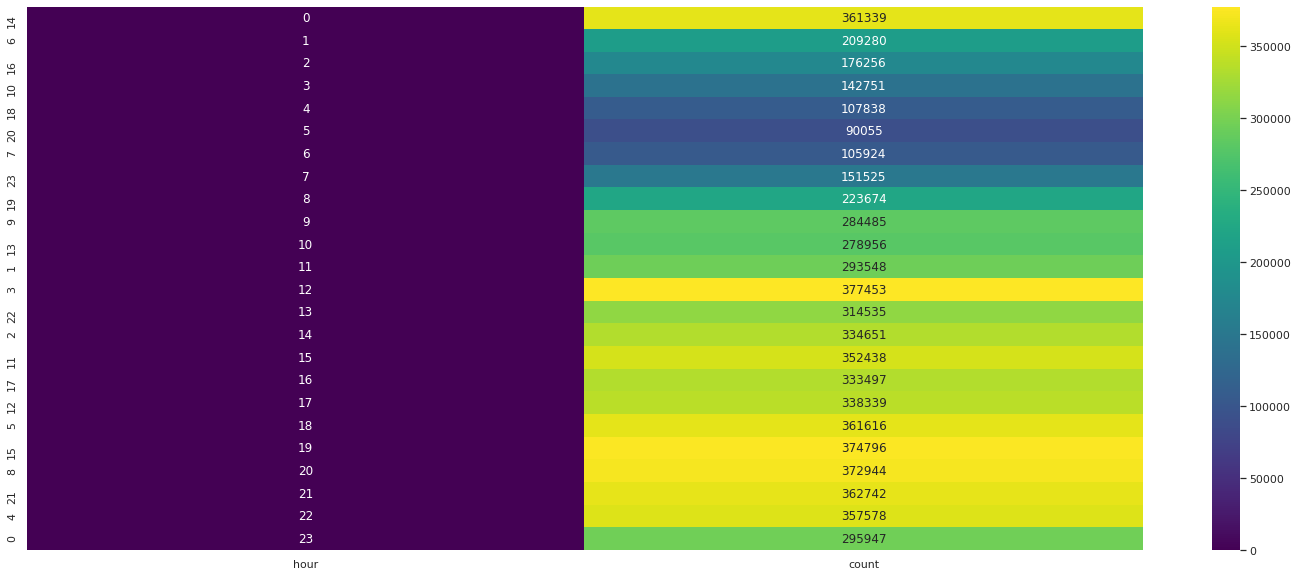

In [0]:
#Use seaborn to plot heatmap - Crime with respect to hour
sns.heatmap(hourly_count_df, annot=True, fmt="g", cmap='viridis')
plt.show()

In [0]:
#Adding predictors (so far fields) that read time information:
df_dates = df_by_hour.withColumn('week_day', dayofweek(df_by_hour['date_time']))\
                 .withColumn('year_month', month(df_by_hour['date_time']))\
                 .withColumn('month_day', dayofmonth(df_by_hour['date_time']))\
                 .withColumn('date_number', datediff(datesdata['date_time'], to_date(lit('2001-01-01'), format='yyyy-MM-dd')))\
                 .cache()

In [0]:
weekday_crimecounts = df_dates.groupBy('week_day').count()

In [0]:
week_day_crime_counts_pddf = pd.DataFrame(weekday_crimecounts.orderBy('week_day').rdd.map(lambda t: t.asDict()).collect())

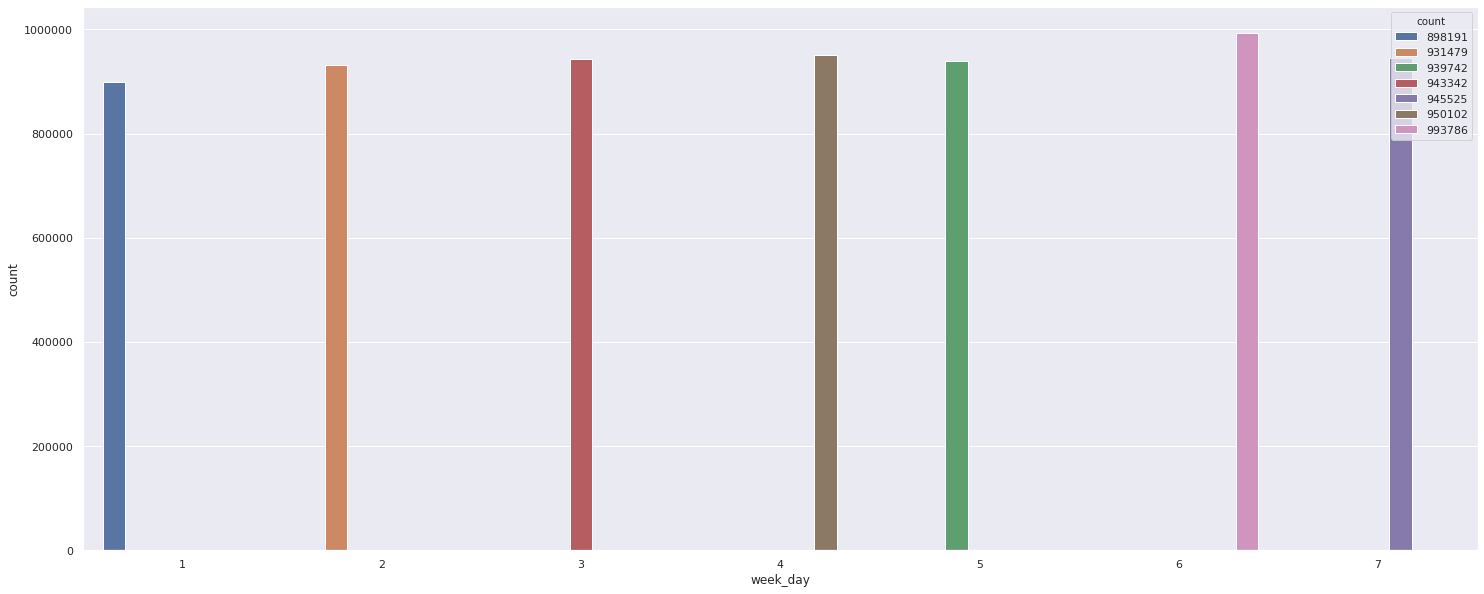

In [0]:
#Plot the graph to see the crime each day of the week
sns.barplot(data=week_day_crime_counts_pddf, x='week_day', y='count',hue = 'count')
display()

Out[160]:

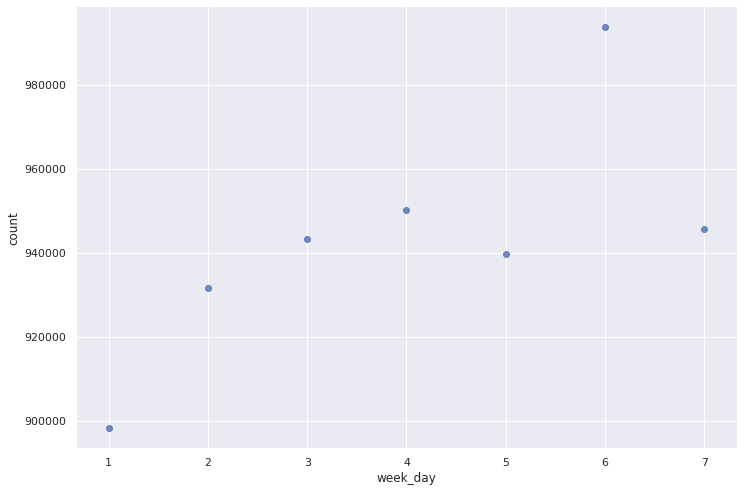

<seaborn.axisgrid.FacetGrid at 0x7fd928e3d7d0>

In [0]:
  #Plot the week_day graph for visualization   
  sns.lmplot('week_day', 'count', data=week_day_crime_counts_pddf, height=7, aspect=1.5, fit_reg=False)

In [0]:
yearmonth_crimecounts = df_dates.groupBy('year_month').count()

In [0]:
yearmonth_crimecounts_pddf = pd.DataFrame(yearmonth_crimecounts.orderBy('year_month').rdd.map(lambda r: r.asDict()).collect())


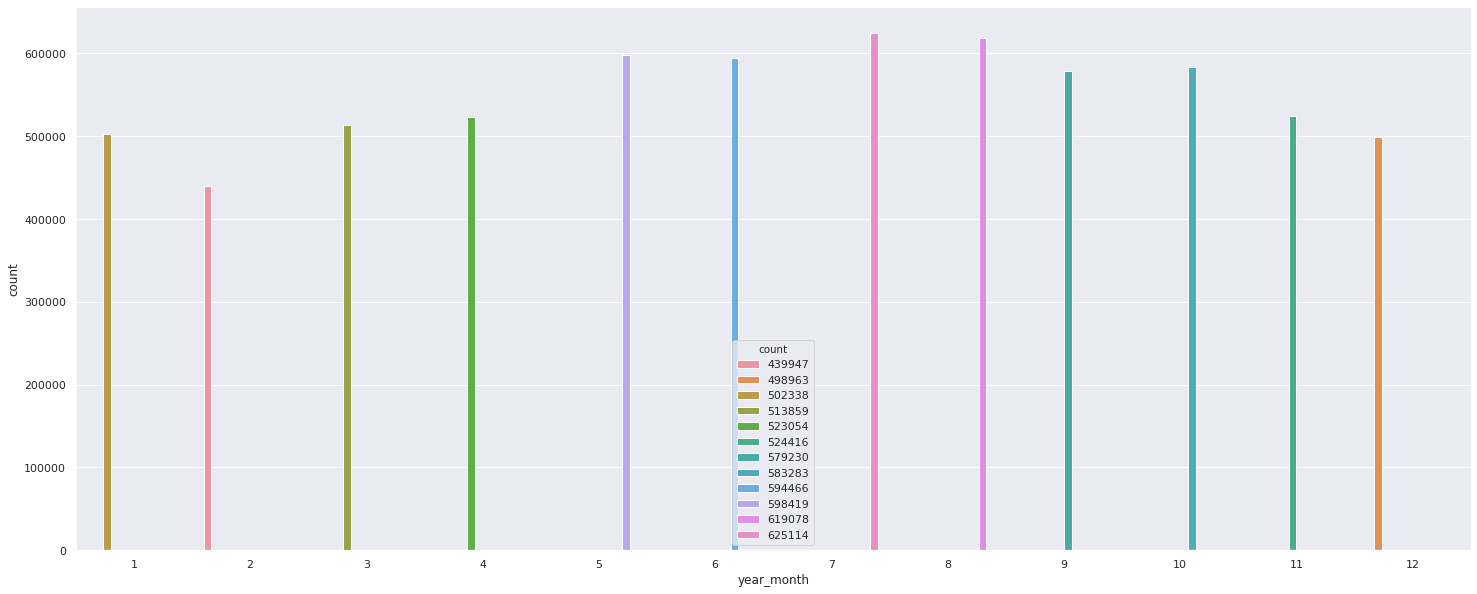

In [0]:
# Plot the graph to visual for which month of the Year the crime rate is high
sns.set_style('darkgrid')
sns.barplot(data=yearmonth_crimecounts_pddf, y='count', x='year_month',hue = 'count')
display()

In [0]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import LogisticRegression

# Regular expression (Regex) tokenizer
regexTokenizer = RegexTokenizer(inputCol="Primary Type", outputCol="words", pattern="\\W")

# stop words
add_stopwords = ["http","https","amp","rt","t","c","the"] # standard stop words

stopwordsRemover = StopWordsRemover(inputCol="words", outputCol="filtered").setStopWords(add_stopwords)

# bag of words count
countVectors = CountVectorizer(inputCol="filtered", outputCol="features", vocabSize=10000, minDF=5)

In [0]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
label_stringIdx = StringIndexer(inputCol = "Primary Type", outputCol = "label")

In [0]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[regexTokenizer, stopwordsRemover, countVectors, label_stringIdx])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(df)
dataset = pipelineFit.transform(df)

In [0]:
dataset.show(5)

+--------+-----------+--------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+----+--------------+--------+----+--------------------+------------+-------------+--------------------+-----------+-----------+--------------+-----+
 ID|Case Number| Date| Block|IUCR|Primary Type| Description|Location Description|Arrest|Domestic|Beat|Ward|Community Area|FBI Code|Year| Updated On| Latitude| Longitude| Location| words| filtered| features|label|
+--------+-----------+--------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+----+--------------+--------+----+--------------------+------------+-------------+--------------------+-----------+-----------+--------------+-----+
10224738| HY411648|09/05/2015 01:30:...| 043XX S WOOD ST|0486| BATTERY|DOMESTIC BATTERY ...| RESIDENCE| false| true| 924| 12| 61| 08B|2015|02/10/2018 03:50:...|41.815117282|-87.669999562|(41.815117282, -8...| [battery]| [battery]|(48,[1],[1.0])| 1.0|
10224739| HY411615|09/04/2015 11:30:...|008XX N CENTRAL AVE|0870| THEFT| POCKET-PICKING| CTA BUS| false| false|1511| 29| 25| 06|2015|02/10/2018 03:50:...|41.895080471|-87.765400451|(41.895080471, -8...| [theft]| [theft]|(48,[0],[1.0])| 0.0|
10224740| HY411595|09/05/2015 12:45:...| 035XX W BARRY AVE|2023| NARCOTICS|POSS: HEROIN(BRN/...| SIDEWALK| true| false|1412| 35| 21| 18|2015|02/10/2018 03:50:...|41.937405765|-87.716649687|(41.937405765, -8...|[narcotics]|[narcotics]|(48,[4],[1.0])| 3.0|
10224741| HY411610|09/05/2015 01:00:...|0000X N LARAMIE AVE|0560| ASSAULT| SIMPLE| APARTMENT| false| true|1522| 28| 25| 08A|2015|02/10/2018 03:50:...|41.881903443|-87.755121152|(41.881903443, -8...| [assault]| [assault]|(48,[6],[1.0])| 4.0|
10224742| HY411435|09/05/2015 10:55:...|082XX S LOOMIS BLVD|0610| BURGLARY| FORCIBLE ENTRY| RESIDENCE| false| false| 614| 21| 71| 05|2015|02/10/2018 03:50:...|41.744378879|-87.658430635|(41.744378879, -8...| [burglary]| [burglary]|(48,[8],[1.0])| 6.0|
+--------+-----------+--------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+----+--------------+--------+----+--------------------+------------+-------------+--------------------+-----------+-----------+--------------+-----+
only showing top 5 rows

In [0]:
### Randomly split data into training and test sets. set seed for reproducibility
(trainData, testData) = dataset.randomSplit([0.7, 0.3], seed = 100)
print("Count of Training Dataset: " + str(trainData.count()))
print("Count of Test Dataset: " + str(testData.count()))

Count of Training Dataset: 4621341
Count of Test Dataset: 1980826

In [0]:
############Logistic Regression using Count Vector Features
# Training the model
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

# Train model with Training Data
lrModel = lr.fit(trainData)

In [0]:
predictions = lrModel.transform(testData)

predictions.filter(predictions['prediction'] == 0) \
    .select("Description","Primary Type","Location Description","label","prediction","probability") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+-----------------------------+------------+--------------------+-----+----------+------------------------------+
 Description|Primary Type|Location Description|label|prediction| probability|
+-----------------------------+------------+--------------------+-----+----------+------------------------------+
 OVER $500| THEFT| OTHER| 0.0| 0.0|[0.5976803088604714,0.08642...|
 OVER $500| THEFT| DEPARTMENT STORE| 0.0| 0.0|[0.5976803088604714,0.08642...|
 $500 AND UNDER| THEFT| ATHLETIC CLUB| 0.0| 0.0|[0.5976803088604714,0.08642...|
 $500 AND UNDER| THEFT| STREET| 0.0| 0.0|[0.5976803088604714,0.08642...|
 $500 AND UNDER| THEFT| OTHER| 0.0| 0.0|[0.5976803088604714,0.08642...|
 $500 AND UNDER| THEFT| DRUG STORE| 0.0| 0.0|[0.5976803088604714,0.08642...|
 OVER $500| THEFT| OTHER| 0.0| 0.0|[0.5976803088604714,0.08642...|
 $500 AND UNDER| THEFT| RESIDENCE| 0.0| 0.0|[0.5976803088604714,0.08642...|
 OVER $500| THEFT| STREET| 0.0| 0.0|[0.5976803088604714,0.08642...|
FINANCIAL ID THEFT: OVER $300| THEFT| RESIDENCE| 0.0| 0.0|[0.5976803088604714,0.08642...|
+-----------------------------+------------+--------------------+-----+----------+------------------------------+
only showing top 10 rows

In [0]:
# Calculate the accuracy of Logistic Regression using Count Vector Features
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

Out[171]: 0.9829054744560428

In [0]:
#Model trained using Naive Bayes Classifiers
from pyspark.ml.classification import NaiveBayes

# create the trainer and set its parameters
nb = NaiveBayes(smoothing=1)

# train the model
model = nb.fit(trainData)

In [0]:
predictions = model.transform(testData)
predictions.filter(predictions['prediction'] == 0) \
    .select("Description","Primary Type","Location Description","label","prediction","probability") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+-----------------------------+------------+----------------------------+-----+----------+------------------------------+
 Description|Primary Type| Location Description|label|prediction| probability|
+-----------------------------+------------+----------------------------+-----+----------+------------------------------+
 OVER $500| THEFT| OTHER| 0.0| 0.0|[0.9330145347528787,9.55162...|
 $500 AND UNDER| THEFT| ATHLETIC CLUB| 0.0| 0.0|[0.9330145347528787,9.55162...|
 $500 AND UNDER| THEFT| STREET| 0.0| 0.0|[0.9330145347528787,9.55162...|
 $500 AND UNDER| THEFT| OTHER| 0.0| 0.0|[0.9330145347528787,9.55162...|
 $500 AND UNDER| THEFT| DRUG STORE| 0.0| 0.0|[0.9330145347528787,9.55162...|
 OVER $500| THEFT| OTHER| 0.0| 0.0|[0.9330145347528787,9.55162...|
 $500 AND UNDER| THEFT| RESIDENCE| 0.0| 0.0|[0.9330145347528787,9.55162...|
 OVER $500| THEFT| STREET| 0.0| 0.0|[0.9330145347528787,9.55162...|
FINANCIAL ID THEFT: OVER $300| THEFT| RESIDENCE| 0.0| 0.0|[0.9330145347528787,9.55162...|
 OVER $500| THEFT|COMMERCIAL / BUSINESS OFFICE| 0.0| 0.0|[0.9330145347528787,9.55162...|
+-----------------------------+------------+----------------------------+-----+----------+------------------------------+
only showing top 10 rows

In [0]:
#Calculate the Accurary of Naive Bayes 
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)

Out[174]: 0.9999912494417309

In [0]:
#Calculate the accuracy for Random Forest algorithm
from pyspark.ml.classification import RandomForestClassifier

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol="label", \
                            featuresCol="features", \
                            numTrees = 100, \
                            maxDepth = 4, \
                            maxBins = 32)

# Train model with Training Data
rfModel = rf.fit(trainData)

In [0]:
predictions = rfModel.transform(testData)

predictions.filter(predictions['prediction'] == 0) \
    .select("Description","Primary Type","Location Description","label","prediction","probability") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+-----------------------------+------------+--------------------+-----+----------+------------------------------+
 Description|Primary Type|Location Description|label|prediction| probability|
+-----------------------------+------------+--------------------+-----+----------+------------------------------+
 OVER $500| THEFT| OTHER| 0.0| 0.0|[0.5355740310772692,0.08563...|
 OVER $500| THEFT| DEPARTMENT STORE| 0.0| 0.0|[0.5355740310772692,0.08563...|
 $500 AND UNDER| THEFT| ATHLETIC CLUB| 0.0| 0.0|[0.5355740310772692,0.08563...|
 $500 AND UNDER| THEFT| STREET| 0.0| 0.0|[0.5355740310772692,0.08563...|
 $500 AND UNDER| THEFT| OTHER| 0.0| 0.0|[0.5355740310772692,0.08563...|
 $500 AND UNDER| THEFT| DRUG STORE| 0.0| 0.0|[0.5355740310772692,0.08563...|
 OVER $500| THEFT| OTHER| 0.0| 0.0|[0.5355740310772692,0.08563...|
 $500 AND UNDER| THEFT| RESIDENCE| 0.0| 0.0|[0.5355740310772692,0.08563...|
 OVER $500| THEFT| STREET| 0.0| 0.0|[0.5355740310772692,0.08563...|
FINANCIAL ID THEFT: OVER $300| THEFT| RESIDENCE| 0.0| 0.0|[0.5355740310772692,0.08563...|
+-----------------------------+------------+--------------------+-----+----------+------------------------------+
only showing top 10 rows

In [0]:
#Calculate the accuracy for Random Forest
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
evaluator.evaluate(predictions)


Out[188]: 0.919707788553316